Testing Combinations: 100%|██████████| 112/112 [00:07<00:00, 14.41it/s]


Migliori parametri: {'d': 13, 'sigmaColor': 30, 'sigmaSpace': 50}


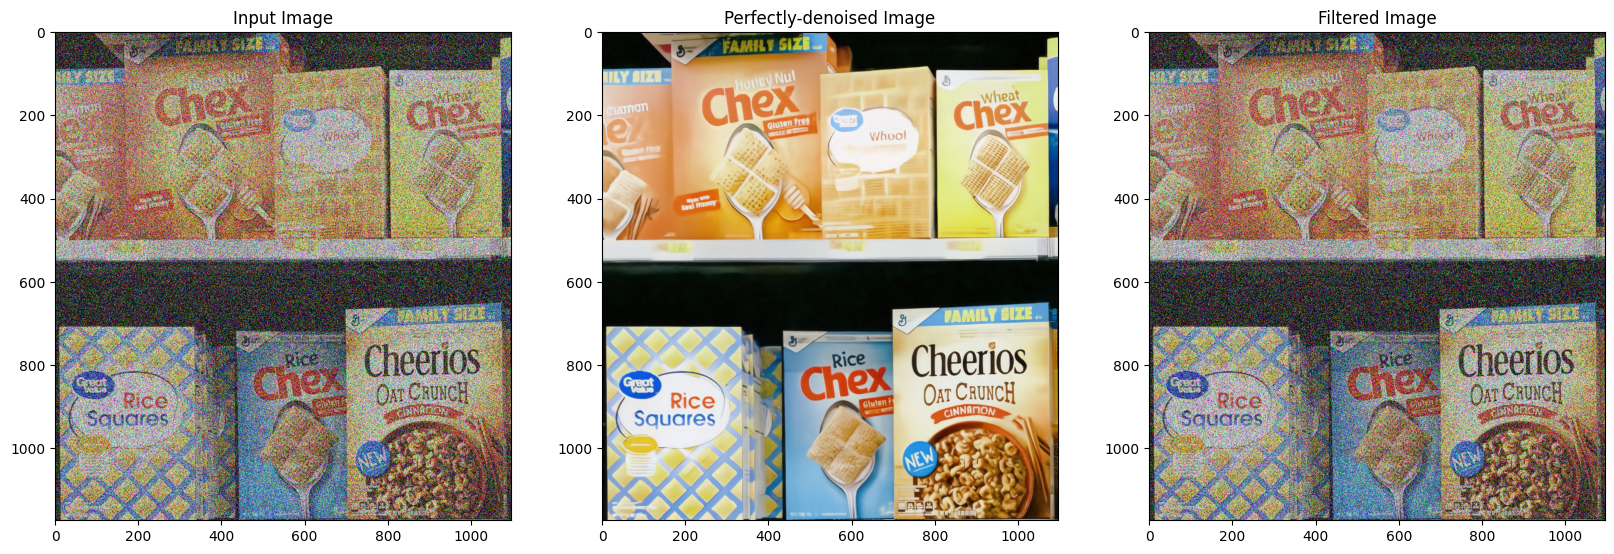

Text(0.5, 1.0, 'Filtering error')

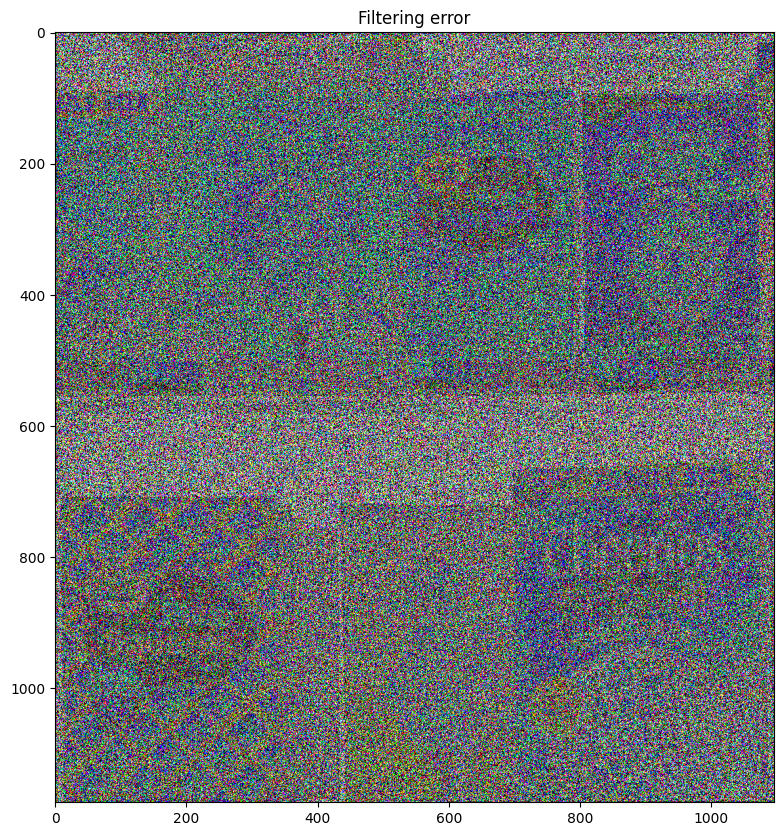

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.model_selection import ParameterGrid
from tqdm import tqdm

# Carica l'immagine di input
noisy_image_path = "/Users/pelle/Desktop/scene4.png"                       # -> Inseire i path 
denoised_image_path = "/Users/pelle/Desktop/scene4_denoised_online.png"    # -> Inseire i path

input_image = cv2.imread(noisy_image_path)              
input_image_denoised = cv2.imread(denoised_image_path)  

# Definisci il range dei parametri da testare
param_grid = {
    'd': [*range(1, 15, 2)],               # -> inserire i range
    'sigmaColor': [*range(10, 80, 20)],    # -> inserire i range
    'sigmaSpace': [*range(10, 80, 20)]     # -> inserire i range
}

 # Calcola il numero totale di iterazioni
total_iterations = len(param_grid['d']) * len(param_grid['sigmaColor']) * len(param_grid['sigmaSpace'])


# Prova tutte le possibili combinazioni di parametri
best_score = float('inf')
best_params = None
with tqdm(total=total_iterations, desc="Testing Combinations") as pbar:
    for params in ParameterGrid(param_grid):
        filtered_image = cv2.bilateralFilter(input_image, **(params))
        # Calcola una qualche metrica di qualità dell'immagine filtrata, ad esempio l'errore quadratico medio
        score = np.mean((input_image_denoised - filtered_image) ** 2)
        # Aggiorna i parametri se otteniamo una migliore qualità dell'immagine filtrata
        if score < best_score:
            best_score = score
            best_params = params
        # Aggiorna la barra di avanzamento
        pbar.update(1)

print("Migliori parametri:", best_params)

# Applica il bilateral filtering con i migliori parametri
filtered_image = cv2.bilateralFilter(input_image, **(best_params))

# Visualizza l'immagine filtrata
plt.figure(figsize=(20,20))
plt.subplot(131); plt.imshow(input_image[:,:,::-1]); plt.title("Input Image")
plt.subplot(132); plt.imshow(input_image_denoised[:,:,::-1]); plt.title("Perfectly-denoised Image")
plt.subplot(133); plt.imshow(filtered_image[:,:,::-1]); plt.title("Filtered Image")
plt.show()

# Visualizza errore
plt.figure(figsize=(10,10))
plt.imshow(abs(input_image[:,:,::-1]-filtered_image[:,:,::-1])); plt.title("Filtering error")
